IMPORTING VARIOUS PACKAGES THAT WILL BE USEFUL FOR ANALYSIS

###### Numpy for numerical computations
###### Pandas for data cleaning, manipulation, and transformation
###### Matplotlib and Seaborn for creating visualizations
###### D-tale to reproduce my analysis with more detail
###### PyGWalker to produce interactive style graphs and charts

In [1]:
import numpy as np
import pandas as pd    
pd.set_option("display.max_columns", None)
import pandas_profiling
from pandas_profiling import ProfileReport
import dtale
import matplotlib.pyplot as plt   
%matplotlib inline  
import seaborn as sns  
import sweetviz as sv  
import pygwalker as pyg

READING DATA INTO DATAFRAME

In [2]:
conflict = pd.read_csv(r"C:\Users\mjaso\OneDrive\fatalities_isr_pse_conflict_2000_to_2023.csv")

## PREPARING AND CLEANING DATA FOR ANALYSIS

VIEWING THE FIRST 3 ROWS OF DATA

In [3]:
conflict.head(3)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...


VIEWING THE LAST 3 ROWS OF DATA

In [4]:
conflict.tail(3)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.
11123,Wichlav Zalsevsky,2000-10-02,24.0,Israeli,Masha,Salfit,West Bank,2000-10-02,M,Israelis,Ashdod,Israel,gunfire,live ammunition,Palestinian civilians,NaN


VIEWING THE SIZE OF THE DATASET

In [5]:
conflict.shape
print(f"The size of this data set is {conflict.shape} ")

The size of this data set is (11124, 16) 


CHECKING FOR DUPLICATED DATA

In [6]:
conflict.duplicated().sum()
print(f"there are {conflict.duplicated().sum()} rows of duplicated data in this dataset")

there are 7 rows of duplicated data in this dataset


VIEWING THE ROWS OF DUPLICATED DATA

In [7]:
conflict[conflict.duplicated()]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
9373,Name unknown to B'Tselem,2003-01-13,NaN,Palestinian,Nitzana,Israel,Israel,2003-01-13,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed by IDF gunfire after he crossed into Is...
9985,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to cross the Gaza perimete...
9986,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed after opening fire at soldiers at the c...
10234,Name unknown to B'Tselem,2002-04-01,NaN,Palestinian,Jenin R.C.,Jenin,West Bank,2002-04-01,NaN,Unknown,NaN,NaN,NaN,NaN,Israeli security forces,"Killed during ""Operation Defensive Shield."""
10817,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10818,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10824,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN


DROPPING DUPLICATED ROWS FROM DATASET

In [8]:
conflict.drop_duplicates(inplace=True)

VERIFYING THAT DUPLICATED DATA HAS BEEN REMOVED

In [9]:
conflict[conflict.duplicated()]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


CHECKING THE N/A VALUES IN DATASET

In [13]:
for na in conflict.columns:
    na_values = conflict[na].isna().sum()
    print(f"{na} has {na_values} N/A values")

name has 0 N/A values
date_of_event has 0 N/A values
age has 122 N/A values
citizenship has 0 N/A values
event_location has 0 N/A values
event_location_district has 0 N/A values
event_location_region has 0 N/A values
date_of_death has 0 N/A values
gender has 14 N/A values
took_part_in_the_hostilities has 1430 N/A values
place_of_residence has 61 N/A values
place_of_residence_district has 61 N/A values
type_of_injury has 290 N/A values
ammunition has 5246 N/A values
killed_by has 0 N/A values
notes has 277 N/A values


DECIDING TO REMOVE ALL N/A VALUES IN THIS DATASET FOR ANALYSIS PURPOSES

In [21]:
conflict.dropna()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,M,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while participating i...
94,Iyad al-'Abed al-Hasani,2023-05-12,51.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces,Senior Islamic Jihad military wing operative. ...
95,Muhammad Walid Muhammad 'Abd al-'Aal,2023-05-12,33.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces,Killed together with another Islamic Jihad mil...
96,'Ali Hassan Muhammad Ghali,2023-05-11,49.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-05-11,M,Yes,Khan Yunis,Khan Yunis,gunfire,missile,Israeli security forces,Senior Islamic Jihad military wing operative. ...
98,Mahmoud Walid Mahmoud 'Abd al-Jawad,2023-05-11,25.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-05-11,M,Yes,Rafah,Rafah,gunfire,missile,Israeli security forces,"Killed together with two of his uncles, one of..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,Hanan Levy,2000-11-02,33.0,Israeli,Jerusalem,Israel,Israel,2000-11-02,M,Israelis,Jerusalem,Israel,explosion,car bomb,Palestinian civilians,killed in a booby-trapped car near the Mahane ...
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians,Killed while he was guarding a National Insura...
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.


CHECKING THE UNIQUE VALUES IN THE DATASET

In [22]:
for col in conflict.columns:
    unique_values = conflict[col].nunique()
    print(f"{col} has {unique_values} unique values")  

name has 11083 unique values
date_of_event has 2405 unique values
age has 95 unique values
citizenship has 4 unique values
event_location has 494 unique values
event_location_district has 20 unique values
event_location_region has 3 unique values
date_of_death has 2593 unique values
gender has 2 unique values
took_part_in_the_hostilities has 5 unique values
place_of_residence has 580 unique values
place_of_residence_district has 20 unique values
type_of_injury has 13 unique values
ammunition has 21 unique values
killed_by has 3 unique values
notes has 6744 unique values


CHECKING THE DATATYPES IN THE DATASET

In [23]:
conflict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           10995 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  datetime64[ns]
 8   gender                        11103 non-null  object        
 9   took_part_in_the_hostilities  9687 non-null   object        
 10  place_of_residence            11056 non-null  object        
 11  place_of_residence_district 

CHANGING THE DATE DATATYPES TO THE CORRECT DATATYPE

###### The date_of_event datatype will be updated from 'object' to 'datetime' datatype
###### The date_of_death datatype will be updated from 'object' to 'datetime datatype

In [17]:
conflict["date_of_event"] = pd.to_datetime(conflict["date_of_event"])
conflict["date_of_death"] = pd.to_datetime(conflict["date_of_death"])

CHECKING THAT THE DATATYPES HAVE BEEN UPDATED

In [18]:
conflict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           10995 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  datetime64[ns]
 8   gender                        11103 non-null  object        
 9   took_part_in_the_hostilities  9687 non-null   object        
 10  place_of_residence            11056 non-null  object        
 11  place_of_residence_district 

CHECKING STATISTICAL INFORMATION ON NUMERICAL DATA

In [19]:
conflict.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


CHECKING STATISTICAL INFORMATION ON NON NUMERICAL DATA

In [20]:
conflict.describe(include="object")  

,name,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
count,11117,11117,11117,11117,11117,11103,9687,11056,11056,10827,5871,11117,10840
unique,11083,4,494,20,3,2,5,580,20,13,21,3,6744
top,Name unknown to B'Tselem,Palestinian,Gaza City,Gaza,Gaza Strip,M,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed during ""Operation Defensive Shield."""
freq,16,10085,2232,2434,7731,9680,4653,2283,2453,9843,2877,9993,112


In [42]:
middle_east_conflict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11117 non-null  object 
 1   date_of_event                 11117 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11117 non-null  object 
 4   event_location                11117 non-null  object 
 5   event_location_district       11117 non-null  object 
 6   event_location_region         11117 non-null  object 
 7   date_of_death                 11117 non-null  object 
 8   gender                        11103 non-null  object 
 9   took_part_in_the_hostilities  9687 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10827 non-null  object 
 13  a

In [43]:
middle_east_conflict["date_of_event"] = pd.to_datetime(middle_east_conflict["date_of_event"])

In [44]:
middle_east_conflict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           10995 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  object        
 8   gender                        11103 non-null  object        
 9   took_part_in_the_hostilities  9687 non-null   object        
 10  place_of_residence            11056 non-null  object        
 11  place_of_residence_district 

In [45]:
middle_east_conflict["date_of_death"] = pd.to_datetime(middle_east_conflict["date_of_death"])

In [46]:
middle_east_conflict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           10995 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  datetime64[ns]
 8   gender                        11103 non-null  object        
 9   took_part_in_the_hostilities  9687 non-null   object        
 10  place_of_residence            11056 non-null  object        
 11  place_of_residence_district 

EXTRACTING THE YEAR FROM DATETIME COLUMNS

In [24]:
conflict["date_of_death"].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
11119    2000
11120    2000
11121    2000
11122    2000
11123    2000
Name: date_of_death, Length: 11117, dtype: int64

EXTRACTING THE MONTH AND DAY FROM DATETIME AND ASSIGNING THE OUTCOME TO NEW COLUMNS

In [28]:
conflict["month_of_event"] = conflict["date_of_event"].dt.month
conflict["month_of_event"]

0         9
1         9
2         9
3         9
4         9
         ..
11119    10
11120    10
11121    10
11122    10
11123    10
Name: month_of_event, Length: 11117, dtype: int64

In [29]:
conflict["month_of_death"] = conflict["date_of_death"].dt.month
conflict["month_of_death"]

0         9
1         9
2         9
3         9
4         9
         ..
11119    10
11120    10
11121    10
11122    10
11123    10
Name: month_of_death, Length: 11117, dtype: int64

In [30]:
conflict["day_of_event"] = conflict["date_of_event"].dt.day_name()
conflict["day_of_event"]

0           Sunday
1           Sunday
2           Friday
3        Wednesday
4          Tuesday
           ...    
11119     Thursday
11120      Tuesday
11121     Saturday
11122     Saturday
11123       Monday
Name: day_of_event, Length: 11117, dtype: object

In [31]:
conflict["day_of_death"] = conflict["date_of_death"].dt.day_name()
conflict["day_of_death"]

0           Sunday
1           Sunday
2           Friday
3        Wednesday
4          Tuesday
           ...    
11119     Thursday
11120      Tuesday
11121     Saturday
11122     Saturday
11123       Monday
Name: day_of_death, Length: 11117, dtype: object

VERIFYING THAT NEW COLUMNS HAVE BEEN ADDED TO DATAFRAME

In [33]:
conflict.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes', 'month_of_event', 'month_of_death',
       'day_of_event', 'day_of_death'],
      dtype='object')

## PERFORMING ANALYSIS 

Age of the oldest victim

In [52]:
oldest_victim = int(conflict["age"].max())
print(f"The age of the oldest victim is {oldest_victim} years old")

The age of the oldest victim is 112 years old


Age of the youngest victim

In [54]:
youngest_victim = int(conflict["age"].min())
print(f"The age of the youngest victim is {youngest_victim} years old")

The age of the youngest victim is 1 years old


Avg age of victim

In [55]:
avg_victim_age = int(conflict["age"].mean())
print(f"The average age of the victims are {avg_victim_age} years old")

The average age of the victims are 26 years old


Count of victims by citizenship

In [135]:
citizenship_count = conflict.groupby("citizenship")["citizenship"].count()
citizenship_count

citizenship
American           1
Israeli         1029
Jordanian          2
Palestinian    10085
Name: citizenship, dtype: int64

Age of oldest victim by citizenship

In [134]:
oldest_victim_by_citizenship = conflict.groupby("citizenship")["age"].max()
oldest_victim_by_citizenship 

citizenship
American        16.0
Israeli         90.0
Jordanian       40.0
Palestinian    112.0
Name: age, dtype: float64

Age of youngest victim by citizenship

In [133]:
youngest_victim_by_citizenship = conflict.groupby("citizenship")["age"].min()
youngest_victim_by_citizenship

citizenship
American       16.0
Israeli         1.0
Jordanian      26.0
Palestinian     1.0
Name: age, dtype: float64

Avg age of victim by citizenship

In [116]:
avg_victim_age_by_citizenship = conflict.groupby("citizenship")["age"].mean()
avg_victim_age_by_citizenship
print(f"Avg age of victim by {avg_victim_age_by_citizenship}")

Avg age of victim by citizenship
American       16.000000
Israeli        35.858685
Jordanian      33.000000
Palestinian    25.814399
Name: age, dtype: float64


Age of oldest victim by citizenship and gender

In [132]:
oldest_victim_by_citizenship_gender = conflict.groupby(["citizenship", "gender"])["age"].max()
oldest_victim_by_citizenship_gender

citizenship  gender
American     M          16.0
Israeli      F          90.0
             M          88.0
Jordanian    F          26.0
             M          40.0
Palestinian  F         112.0
             M         101.0
Name: age, dtype: float64

Age of youngest victim by citizenship and gender

In [104]:
youngest_victim_by_citizenship_gender = conflict.groupby(["citizenship", "gender"])["age"].min()
youngest_victim_by_citizenship_gender

citizenship  gender
American     M         16.0
Israeli      F          1.0
             M          1.0
Jordanian    F         26.0
             M         40.0
Palestinian  F          1.0
             M          1.0
Name: age, dtype: float64

Avg age of victim by citizenship and gender

In [105]:
avg_victim_age_by_citizenship_gender = conflict.groupby(["citizenship", "gender"])["age"].mean()
avg_victim_age_by_citizenship_gender

citizenship  gender
American     M         16.000000
Israeli      F         37.670769
             M         35.010086
Jordanian    F         26.000000
             M         40.000000
Palestinian  F         27.908240
             M         25.563279
Name: age, dtype: float64

Count of victims by region and gender

In [199]:
victim_count_by_region_gender = conflict.groupby(["event_location_region"])["gender"].value_counts()
victim_count_by_region_gender

event_location_region  gender
Gaza Strip             M         6724
                       F          997
Israel                 M          439
                       F          238
West Bank              M         2517
                       F          188
Name: gender, dtype: int64

Count of victims by gender and type of injury

In [239]:
victims_by_gender_type_of_injury = conflict.groupby(["gender"])["type_of_injury"].value_counts()
victims_by_gender_type_of_injury

gender  type_of_injury              
F       gunfire                         1132
        explosion                        218
        shelling                          20
        stabbing                          14
        hit by a vehicle                   4
        house demolition                   4
        Strangulation                      1
        fire                               1
        physical assault                   1
        physically assaulted               1
        stones throwing                    1
M       gunfire                         8698
        explosion                        337
        shelling                         291
        stabbing                          34
        house demolition                  21
        hit by a vehicle                  14
        beating                            9
        stones throwing                    5
        being bludgeoned with an axe       4
        fire                               3
        physically

Count of victims by region and type of injury

In [96]:
conflict.groupby(["event_location_region"])["type_of_injury"].value_counts()

event_location_region  type_of_injury              
Gaza Strip             gunfire                         7158
                       shelling                         310
                       explosion                         79
                       house demolition                  16
                       stabbing                           2
Israel                 explosion                        422
                       gunfire                          218
                       stabbing                          16
                       hit by a vehicle                   8
                       being bludgeoned with an axe       2
                       Strangulation                      1
                       physical assault                   1
West Bank              gunfire                         2467
                       explosion                         54
                       stabbing                          30
                       hit by a vehicle         

Count of groups that killed the most victims by region

In [213]:
victim_count_by_groups_region = conflict.groupby(["event_location_region"])["killed_by"].value_counts()
victim_count_by_groups_region

event_location_region  killed_by              
Gaza Strip             Israeli security forces    7541
                       Palestinian civilians       186
                       Israeli civilians             4
Israel                 Palestinian civilians       550
                       Israeli security forces     119
                       Israeli civilians             9
West Bank              Israeli security forces    2333
                       Palestinian civilians       292
                       Israeli civilians            83
Name: killed_by, dtype: int64

Top injury types

In [141]:
top_injury_types = conflict["type_of_injury"].value_counts()
top_injury_types

gunfire                         9843
explosion                        555
shelling                         311
stabbing                          48
house demolition                  25
hit by a vehicle                  18
beating                            9
stones throwing                    6
being bludgeoned with an axe       4
fire                               4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: type_of_injury, dtype: int64

Type of injury by gender

In [152]:
most_injury_type_by_gender = conflict.groupby(["gender"])["type_of_injury"].value_counts()
most_injury_type_by_gender.sort_values(ascending=False)

gender  type_of_injury              
M       gunfire                         8698
F       gunfire                         1132
M       explosion                        337
        shelling                         291
F       explosion                        218
M       stabbing                          34
        house demolition                  21
F       shelling                          20
        stabbing                          14
M       hit by a vehicle                  14
        beating                            9
        stones throwing                    5
F       house demolition                   4
        hit by a vehicle                   4
M       being bludgeoned with an axe       4
        fire                               3
F       physical assault                   1
        physically assaulted               1
        stones throwing                    1
        fire                               1
        Strangulation                      1
M       physically

Highest years with victim casualties

In [250]:
victims_years = conflict["date_of_death"].dt.year.value_counts().sort_values(ascending=False)
victims_years

2014    2326
2002    1323
2009    1059
2004     922
2008     900
2003     731
2006     681
2007     400
2001     345
2021     324
2018     301
2012     262
2023     250
2005     240
2022     205
2015     179
2019     146
2011     130
2016     116
2010      89
2017      80
2013      42
2000      35
2020      31
Name: date_of_death, dtype: int64

Count of victims per month

In [269]:
victims_month = conflict["month_of_death"].value_counts()
victims_month

7     2123
1     1461
8     1113
12     951
5      919
3      894
11     771
10     736
4      662
6      528
2      489
9      470
Name: month_of_death, dtype: int64

Count of victims per month by gender

In [171]:
highest_victim_by_month_gender = conflict.groupby(["month_of_death"])["gender"].value_counts()
highest_victim_by_month_gender

month_of_death  gender
1               M         1238
                F          223
2               M          466
                F           23
3               M          801
                F           91
4               M          610
                F           49
5               M          790
                F          124
6               M          455
                F           73
7               M         1713
                F          410
8               M          912
                F          201
9               M          437
                F           32
10              M          672
                F           63
11              M          693
                F           78
12              M          893
                F           56
Name: gender, dtype: int64

Count of victims per month by gender and citizenship

In [172]:
conflict.groupby(["month_of_death", "citizenship"])["gender"].value_counts()

month_of_death  citizenship  gender
1               Israeli      M           63
                             F           18
                Palestinian  M         1175
                             F          205
2               American     M            1
                Israeli      M           39
                             F           15
                Palestinian  M          426
                             F            8
3               Israeli      M          104
                             F           49
                Palestinian  M          697
                             F           42
4               Israeli      M           37
                             F           14
                Jordanian    M            1
                Palestinian  M          572
                             F           35
5               Israeli      M           66
                             F           32
                Palestinian  M          724
                             F          

Count of victims per day

In [295]:
victims_day = conflict["day_of_death"].value_counts()
victims_day

Thursday     1697
Wednesday    1669
Saturday     1658
Tuesday      1607
Friday       1554
Sunday       1489
Monday       1443
Name: day_of_death, dtype: int64

Count of victims per day by gender

In [174]:
conflict.groupby(["day_of_death"])["gender"].value_counts()

day_of_death  gender
Friday        M         1380
              F          173
Monday        M         1268
              F          170
Saturday      M         1489
              F          169
Sunday        M         1235
              F          251
Thursday      M         1495
              F          200
Tuesday       M         1339
              F          267
Wednesday     M         1474
              F          193
Name: gender, dtype: int64

Count of victims per day by gender and citizenship

In [175]:
conflict.groupby(["day_of_death", "citizenship"])["gender"].value_counts()

day_of_death  citizenship  gender
Friday        American     M            1
              Israeli      M           81
                           F           38
              Palestinian  M         1298
                           F          135
Monday        Israeli      M           58
                           F           27
              Jordanian    F            1
                           M            1
              Palestinian  M         1209
                           F          142
Saturday      Israeli      M           81
                           F           28
              Palestinian  M         1408
                           F          141
Sunday        Israeli      M          128
                           F           54
              Palestinian  M         1107
                           F          197
Thursday      Israeli      M          129
                           F           53
              Palestinian  M         1366
                           F          147


## VISUALIZATIONS

###### Percentage of Victims by Citizenship Pie Chart

This graph displays that the Palestinians have the highest percentage of victims by citizenship.


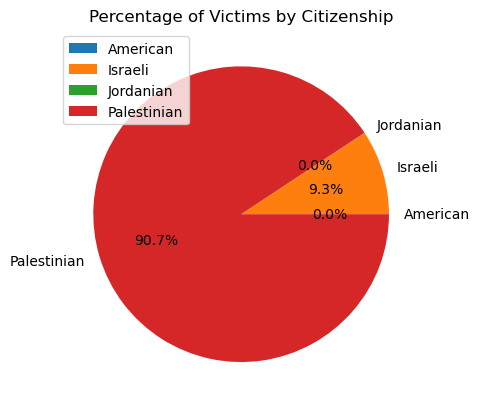

In [265]:
citizenship_count = conflict.groupby("citizenship")["citizenship"].count()
citizenship_count.plot(kind="pie", autopct="%1.1f%%"),plt.title("Percentage of Victims by Citizenship"), plt.ylabel(""), plt.legend(loc=2)  
print("This graph displays that the Palestinians have the highest percentage of victims by citizenship.")

###### Average Age of Victims by Citizenship Bar Chart

This bar graph is the representation of the average ages of victims, with the Israelis having the highest average age of victims around 35 years old.


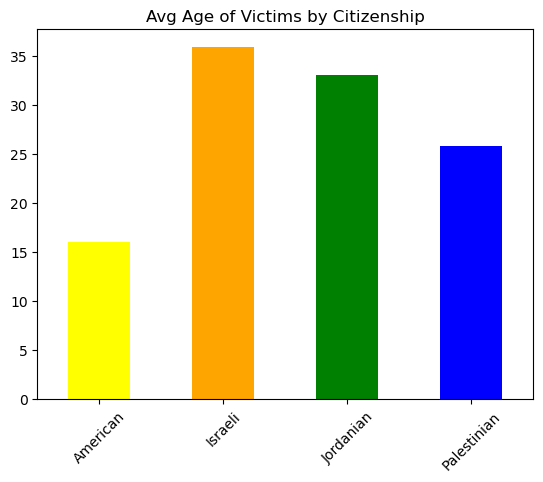

In [266]:
avg_victim_age_by_citizenship = conflict.groupby("citizenship")["age"].mean()
c = ["yellow", "orange", "green", "blue"]
avg_victim_age_by_citizenship.plot(kind="bar", color=c, rot=45),
plt.title("Avg Age of Victims by Citizenship"),
plt.xlabel("")
print("This bar graph is the representation of the average ages of victims, with the Israelis having the highest average age of victims around 35 years old.")

###### Average Age of Victims by Citizenship and Gender Bar Chart

This graph represents the average age of victims by citizenship and gender.


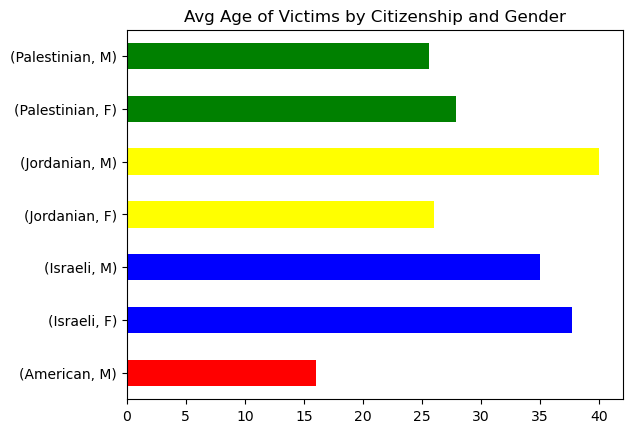

In [267]:
avg_victim_age_by_citizenship_gender = conflict.groupby(["citizenship", "gender"])["age"].mean()
c = ["red", "blue", "blue", "yellow", "yellow", "green", "green"]
avg_victim_age_by_citizenship_gender.plot(kind="barh", color=c),
plt.title("Avg Age of Victims by Citizenship and Gender"),
plt.ylabel("")
print("This graph represents the average age of victims by citizenship and gender.")

###### Count of Victims by Region and Gender Bar Chart

According to the graph, males in all regions held the higher victim count.


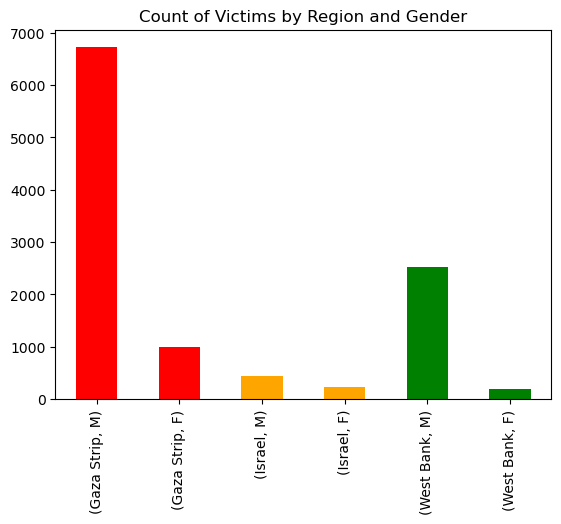

In [263]:
victim_count_by_region_gender = conflict.groupby(["event_location_region"])["gender"].value_counts()
c = ["red", "red", "orange", "orange", "green", "green"]
victim_count_by_region_gender.plot(kind="bar", color=c),
plt.title("Count of Victims by Region and Gender"),
plt.xlabel("")
print("According to the graph, males in all regions held the higher victim count.")

###### Count of Groups that killed the most Victims by Region Bar Chart

This graph represents the number of victims by region and group.
It displays that Israeli Security Forces have killed more victims in the West Bank and in the Gaza Strip.
While Palestinian Civilians have killed the most victims in Israel.


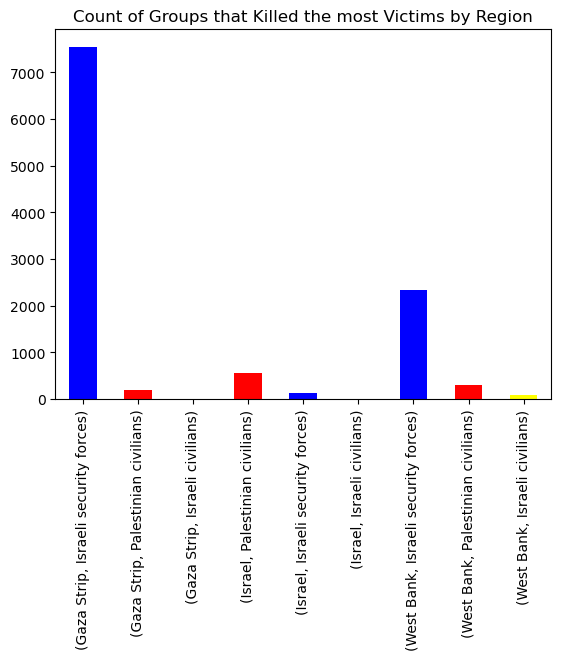

In [261]:
victim_count_by_groups_region = conflict.groupby(["event_location_region"])["killed_by"].value_counts()
c = ["blue", "red", "yellow", "red", "blue", "yellow", "blue", "red", "yellow"]
victim_count_by_groups_region.plot(kind="bar", color=c),
plt.title("Count of Groups that Killed the most Victims by Region"), 
plt.xlabel("")
print("This graph represents the number of victims by region and group.")
print("It displays that Israeli Security Forces have killed more victims in the West Bank and in the Gaza Strip.") 
print("While Palestinian Civilians have killed the most victims in Israel.")

###### Top 5 Injury Types Bar Chart

This chart represents the number of deaths by injury type, with gunfire being the number 1 injury.


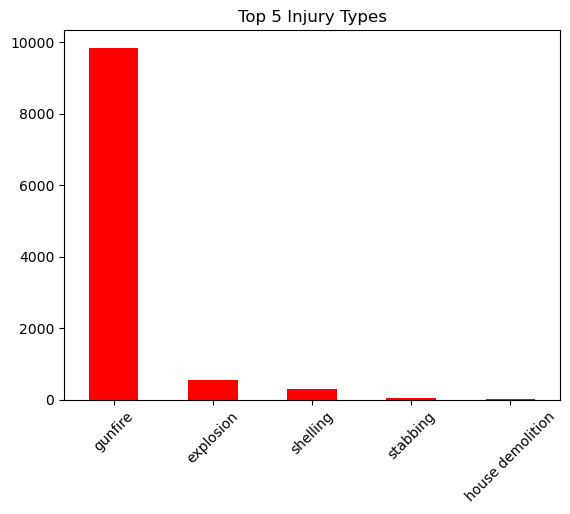

In [262]:
top_injury_types = conflict["type_of_injury"].value_counts()[:5]
top_injury_types.plot(kind="bar", color="red", rot=45),
plt.title("Top 5 Injury Types") 
print("This chart represents the number of deaths by injury type, with gunfire being the number 1 injury.") 

###### Top 10 Years with the Highest Number of Victims Bar Chart

This graph represnets the last 10 years with the most number of victims, with the year 2022 proving to be the deadliest year.


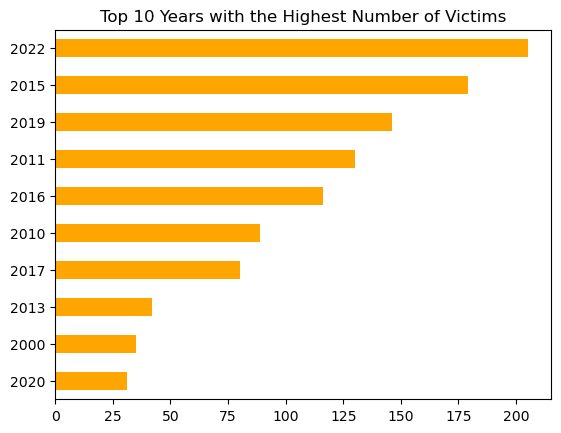

In [268]:
victims_years = conflict["date_of_death"].dt.year.value_counts().sort_values(ascending=True)
victims_years[:10].plot(kind="barh", color="orange"),
plt.title("Top 10 Years with the Highest Number of Victims")
print("This graph represnets the last 10 years with the most number of victims, with the year 2022 proving to be the deadliest year.")

###### Victim Count by Month Bar Chart

This graph displays the number of victims by month. The months of July has seen the higest victim count, while the months of September see the lowest victim count.


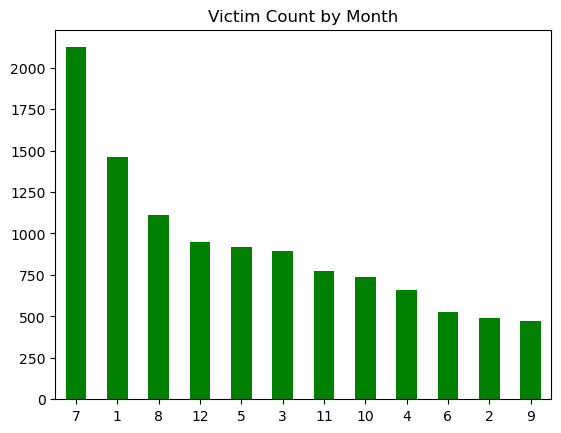

In [309]:
victims_month = conflict["month_of_death"].value_counts()
victims_month.sort_values(ascending=False).plot(kind="bar", color="green", rot=0),
plt.title("Victim Count by Month")
print("This graph displays the number of victims by month. The months of July has seen the higest victim count, while the months of September see the lowest victim count.")

###### Victim Count by Month and Gender Bar Chart

This graph is a representation of the number of victims, male and female, by month.


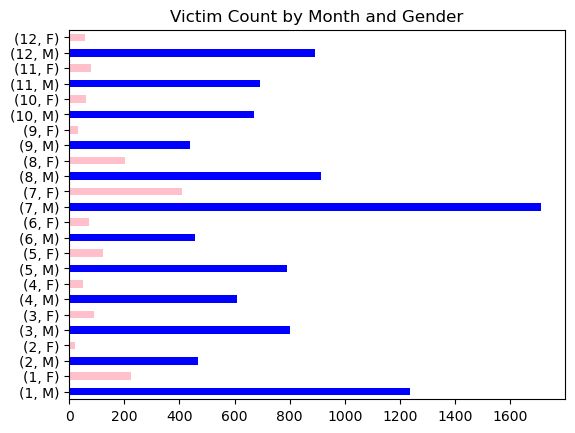

In [315]:
highest_victim_by_month_gender = conflict.groupby(["month_of_death"])["gender"].value_counts()
c = ["blue", "pink"]
highest_victim_by_month_gender.plot(kind="barh", color=c),
plt.title("Victim Count by Month and Gender"),
plt.ylabel("")
print("This graph is a representation of the number of victims, male and female, by month.")

###### Victim Count by Day Line Chart

This chart displays the number of victims by day, with Thursday's having the highest victim count and Monday's having the lowest.


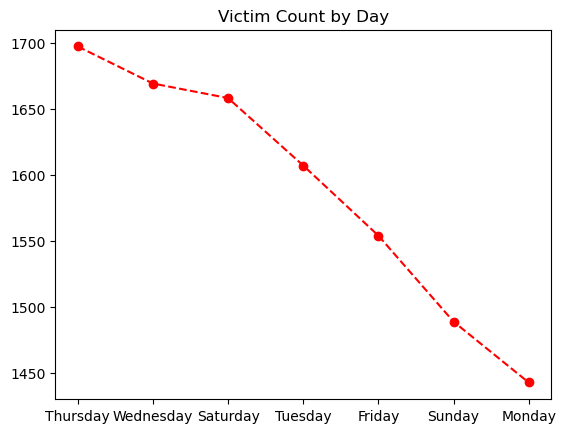

In [310]:
victims_day = conflict["day_of_death"].value_counts()
victims_day.plot(color="red", linestyle="--", marker="o", label="line with marker"),
plt.title("Victim Count by Day")
print("This chart displays the number of victims by day, with Thursday's having the highest victim count and Monday's having the lowest.")

###### Count of Victims per Day by Gender Bar Chart

This graph represents the number of male vs female victims by day. With males being victims more than half the time.


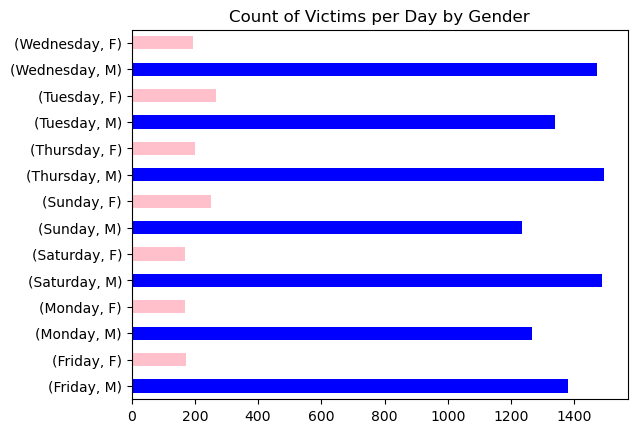

In [314]:
victims_day_gender = conflict.groupby(["day_of_death"])["gender"].value_counts()
c = ["blue", "pink"]
victims_day_gender.plot(kind="barh", color=c), 
plt.title("Count of Victims per Day by Gender"),
plt.ylabel("")
print("This graph represents the number of male vs female victims by day. With males being victims more than half the time.") 